# **종합실습2 이변량분석(y-범주) : 직원 이직 분석**

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,27,2,1898,Female,3,Single,6500,No,14,9
1,0,27,9,1965,Male,4,Single,4105,No,14,7
2,0,44,2,1703,Female,4,Married,7879,Yes,19,9
3,0,42,2,1231,Male,1,Married,6272,No,16,10
4,0,32,1,2016,Female,4,Married,10422,No,19,14


> * 변수설명
    * **Attrition**	:	이직여부, Yes , No (**Target**)
    * **Age**	:	나이
    * **DistanceFromHome**	:	집-직장 거리(마일)
    * **EmployeeNumber**	:	사번
    * **Gender**	:	성별(Male, Female)
    * **JobSatisfaction**	:	직무 만족도, 다음시트 참조
    * **MaritalStatus**	:	결혼상태(Married, Single, Divorced)
    * **MonthlyIncome**	:	월급(달러)
    * **OverTime**	:	야근여부
    * **PercentSalaryHike**	:	전년대비 급여인상율(%)
    * **TotalWorkingYears**	:	총 근무 연수



## **2.범주-->범주**

In [3]:
target = 'Attrition'

### **(1) Gender --> Attrition**

In [14]:
feature = 'Gender'

* 교차표

In [15]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,157,248
1,66,129


In [23]:
display(pd.crosstab(data[target], data[feature], normalize = 'columns'))

Gender,Female,Male
Attrition,,
0,0.704036,0.657825
1,0.295964,0.342175


* 시각화

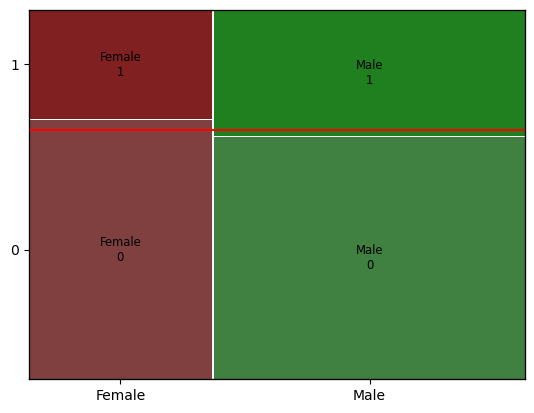

In [21]:
mosaic(data, [feature, target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [22]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             157   248
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.1614318259891623
p-value 0.28116879016055174
자유도 1
기대빈도
 [[150.525 254.475]
 [ 72.475 122.525]]


* 파악된 내용을 기술해 봅시다.

In [ ]:
# 카이제곱검정으로는 관련이 없다고 나오나, 그래프로 볼때 약간 관련이 있다고 판단됨.

### **(2) JobSatisfaction --> Attrition**

In [7]:
def analyzeCC(var,targ, data=data):
    mosaic(data, [var,targ])
    plt.axhline(1-data[target].mean(), color='r')
    plt.show()
    
    table = pd.crosstab(data[var], data[targ])
    print(f'교차표\n {table}')
    print('-'*50)
    
    result = spst.chi2_contingency(table)
    print(f'카이제곱통계량 : {result[0]}')
    print(f'p-value : {result[1]}')
    print(f'자유도 : {result[2]}')
    print(f'기대빈도\n {result[3]}')

* 교차표

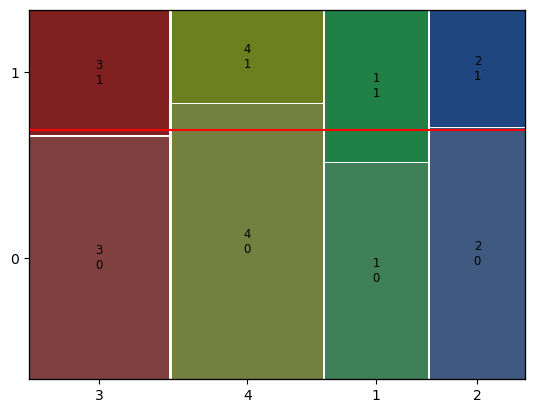

교차표
 Attrition          0   1
JobSatisfaction         
1                 74  52
2                 79  37
3                114  59
4                138  47
--------------------------------------------------
카이제곱통계량 : 8.884191097554549
p-value : 0.03087092125625072
자유도 : 3
기대빈도
 [[ 85.05   40.95 ]
 [ 78.3    37.7  ]
 [116.775  56.225]
 [124.875  60.125]]


In [8]:
analyzeCC('JobSatisfaction', 'Attrition')

* 파악된 내용을 기술해 봅시다.

### **(3) MaritalStatus --> Attrition**

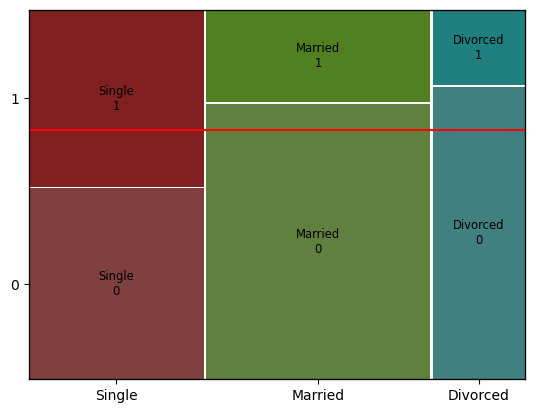

교차표
 Attrition        0    1
MaritalStatus          
Divorced        89   23
Married        205   69
Single         111  103
--------------------------------------------------
카이제곱통계량 : 37.82971190707053
p-value : 6.100738829354204e-09
자유도 : 2
기대빈도
 [[ 75.6   36.4 ]
 [184.95  89.05]
 [144.45  69.55]]


In [9]:
analyzeCC('MaritalStatus', 'Attrition')

* 파악된 내용을 기술해 봅시다.

### **(4) OverTime --> Attrition**

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

## **3.숫자-->범주**

### **(1) Age --> Attrition**

In [10]:
feature = 'Age'

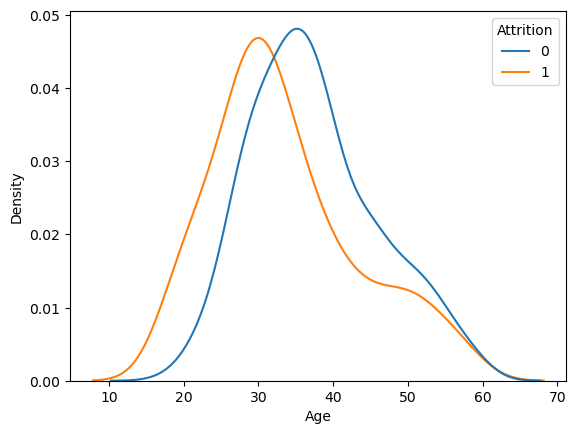

In [11]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

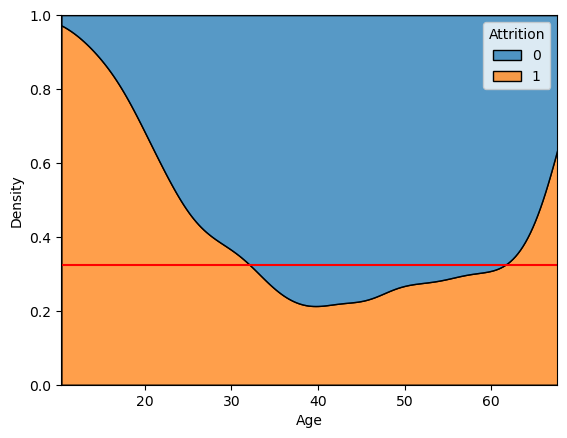

In [12]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

### **(2) DistanceFromHome --> Attrition**

In [24]:
def analyzeNC(var, targ, data=data):
    plt.figure(figsize=(6,12))
    xmin, xmax = data[var].min(), data[var].max()
    
    plt.subplot(3,1,1)
    sns.kdeplot(x=var, data=data, hue=targ, common_norm=False)
    plt.xlim(xmin, xmax) 
    
    plt.subplot(3,1,2)
    sns.kdeplot(x=var, data=data, hue=targ, multiple="fill")
    plt.axhline(data[target].mean(), color = 'r') 
    plt.xlim(xmin, xmax) 
    
    plt.subplot(3,1,3)
    sns.histplot(x=var, data=data, hue=targ, multiple='fill')
    plt.axhline(data[target].mean(), color = 'r') 
    plt.xlim(xmin, xmax) 
    
    
    plt.tight_layout() 
    plt.show()

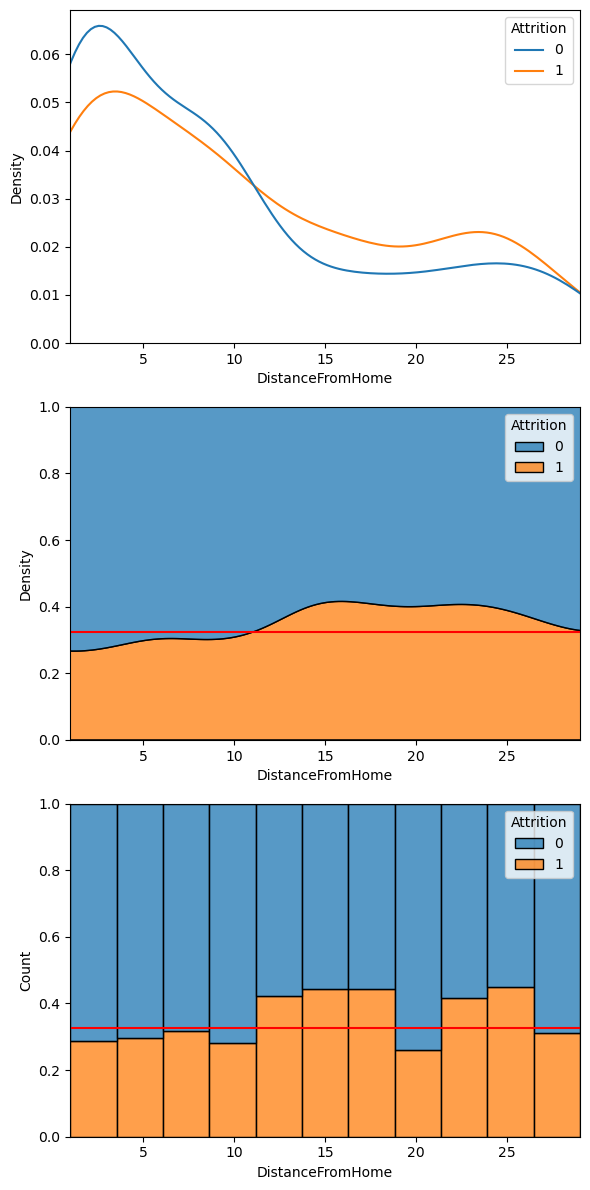

In [25]:
analyzeNC('DistanceFromHome','Attrition')

* 파악된 내용을 기술해 봅시다.

### **(3) MonthlyIncome --> Attrition**

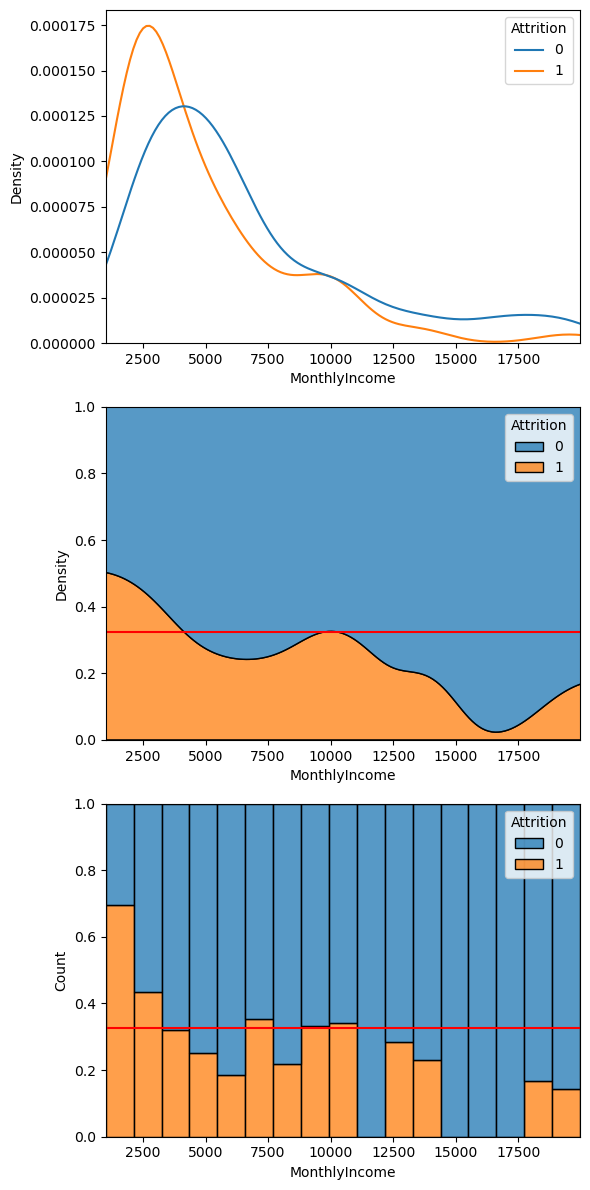

In [27]:
analyzeNC('MonthlyIncome','Attrition')

* 파악된 내용을 기술해 봅시다.

### **(4) PercentSalaryHike --> Attrition**

* 파악된 내용을 기술해 봅시다.

### **(5) TotalWorkingYears --> Attrition**

* 파악된 내용을 기술해 봅시다.

## **4.관계 정리하기**

① 강한관계

② 중간관계

③ 관계없음(약한 관계)

In [28]:
data = pd.read_csv('https://bit.ly/3PArw4W')
data.corr()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


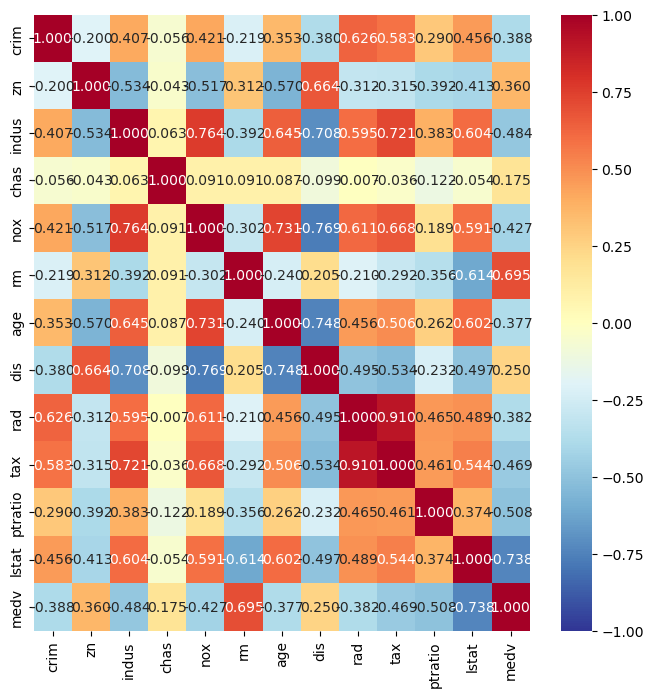

In [29]:
plt.figure(figsize = (8, 8))
sns.heatmap(data.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()